In [1]:
import pandas as pd 
import os
import os
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from wordcloud import STOPWORDS
from collections import defaultdict

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests


from transformers import pipeline



/home/tevin/Desktop/Tems/twitter/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-12 16:37:48.078591: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 16:37:53.801468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
combined_df = pd.read_csv('processed_fb_posts.csv')

sentiment
NEG     59
NEU    425
POS    698
dtype: int64


<Axes: >

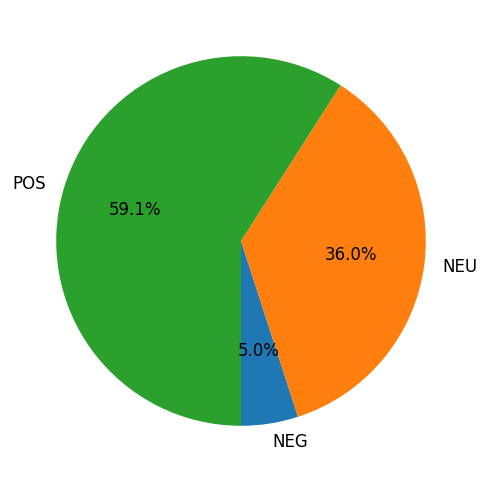

In [3]:
# Let's count the number of tweets by sentiments
sentiment_counts = combined_df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


In [8]:
combined_df.head()

,thumb,url,text,likes,comments,shares,sentiment
0,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Matters climate change mitigation and adaptati...,19.0,0.0,2.0,NEU
1,NaN,https://www.facebook.com/christopher.kiptoo.5/...,We The National Treasury led by Cabinet Secret...,79.0,5.0,1.0,NaN
2,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Congratulations. Let us keep greening Kenya in...,22.0,0.0,0.0,POS
3,NaN,https://www.facebook.com/christopher.kiptoo.5/...,While here in Rome Italy attending the United ...,44.0,1.0,1.0,NEU
4,NaN,https://www.facebook.com/christopher.kiptoo.5/...,In Rome Italy this week accompanying Deputy Pr...,91.0,1.0,7.0,NaN


In [9]:
import numpy as np
import re

# Define a function to remove the Twitter handles
def remove_pattern(text, pattern):
    if isinstance(text, str):
        return re.sub(pattern, '', text)
    else:
        return text

# Replace NaN values in the 'text' column with empty strings
combined_df['text'].fillna('', inplace=True)

# Remove Twitter handles and store the result in a new column 'Tidy_Text'
combined_df['Tidy_Text'] = np.vectorize(remove_pattern)(combined_df['text'], "@[\w]*")

combined_df.head()


,thumb,url,text,likes,comments,shares,sentiment,Tidy_Text
0,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Matters climate change mitigation and adaptati...,19.0,0.0,2.0,NEU,Matters climate change mitigation and adaptati...
1,NaN,https://www.facebook.com/christopher.kiptoo.5/...,We The National Treasury led by Cabinet Secret...,79.0,5.0,1.0,NaN,We The National Treasury led by Cabinet Secret...
2,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Congratulations. Let us keep greening Kenya in...,22.0,0.0,0.0,POS,Congratulations. Let us keep greening Kenya in...
3,NaN,https://www.facebook.com/christopher.kiptoo.5/...,While here in Rome Italy attending the United ...,44.0,1.0,1.0,NEU,While here in Rome Italy attending the United ...
4,NaN,https://www.facebook.com/christopher.kiptoo.5/...,In Rome Italy this week accompanying Deputy Pr...,91.0,1.0,7.0,NaN,In Rome Italy this week accompanying Deputy Pr...


In [10]:
#removing special characters, numbers, punctuations
combined_df['Tidy_Text'] = combined_df['Tidy_Text'].str.replace("[^a-zA-Z#]", " ")

combined_df.head(3)

,thumb,url,text,likes,comments,shares,sentiment,Tidy_Text
0,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Matters climate change mitigation and adaptati...,19.0,0.0,2.0,NEU,Matters climate change mitigation and adaptati...
1,NaN,https://www.facebook.com/christopher.kiptoo.5/...,We The National Treasury led by Cabinet Secret...,79.0,5.0,1.0,NaN,We The National Treasury led by Cabinet Secret...
2,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Congratulations. Let us keep greening Kenya in...,22.0,0.0,0.0,POS,Congratulations. Let us keep greening Kenya in...


In [11]:
#removing short words
combined_df['Tidy_Text'] = combined_df['Tidy_Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combined_df.head(3)

,thumb,url,text,likes,comments,shares,sentiment,Tidy_Text
0,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Matters climate change mitigation and adaptati...,19.0,0.0,2.0,NEU,Matters climate change mitigation adaptation K...
1,NaN,https://www.facebook.com/christopher.kiptoo.5/...,We The National Treasury led by Cabinet Secret...,79.0,5.0,1.0,NaN,National Treasury Cabinet Secretary Prof. Njug...
2,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Congratulations. Let us keep greening Kenya in...,22.0,0.0,0.0,POS,Congratulations. keep greening Kenya order mit...


In [15]:
#tokenization
tokenized_text  = combined_df['Tidy_Text'].apply(lambda x: x.split())
tokenized_text.head()

0    [Matters, climate, change, mitigation, adaptat...
1    [National, Treasury, Cabinet, Secretary, Prof....
2    [Congratulations., keep, greening, Kenya, orde...
3    [While, here, Rome, Italy, attending, United, ...
4    [Rome, Italy, this, week, accompanying, Deputy...
Name: Tidy_Text, dtype: object

In [16]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_text = tokenized_text .apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_text.head()

0      [matter, climat, chang, mitig, adapt, kaptagat]
1    [nation, treasuri, cabinet, secretari, prof., ...
2    [congratulations., keep, green, kenya, order, ...
3    [while, here, rome, itali, attend, unit, natio...
4    [rome, itali, thi, week, accompani, deputi, pr...
Name: Tidy_Text, dtype: object

In [17]:
#stitching tokens back together
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])

combined_df['Tidy_Text'] = tokenized_text
combined_df.head(3)

,thumb,url,text,likes,comments,shares,sentiment,Tidy_Text
0,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Matters climate change mitigation and adaptati...,19.0,0.0,2.0,NEU,matter climat chang mitig adapt kaptagat
1,NaN,https://www.facebook.com/christopher.kiptoo.5/...,We The National Treasury led by Cabinet Secret...,79.0,5.0,1.0,NaN,nation treasuri cabinet secretari prof. njugun...
2,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Congratulations. Let us keep greening Kenya in...,22.0,0.0,0.0,POS,congratulations. keep green kenya order mitig ...


In [18]:
#store all the words from the tweets that are positive
all_words_positive= ' '.join([text for text in combined_df['Tidy_Text'][combined_df['sentiment'] == 'POS']])

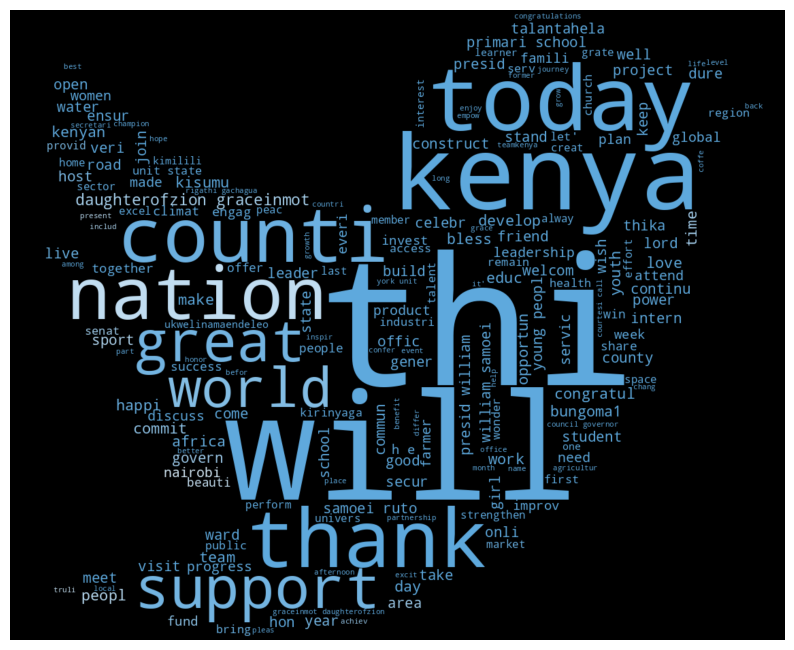

In [22]:

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)



# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [23]:
#store all the words from the tweets that are negative
all_words_negative= ' '.join([text for text in combined_df['Tidy_Text'][combined_df['sentiment'] == 'NEG']])
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

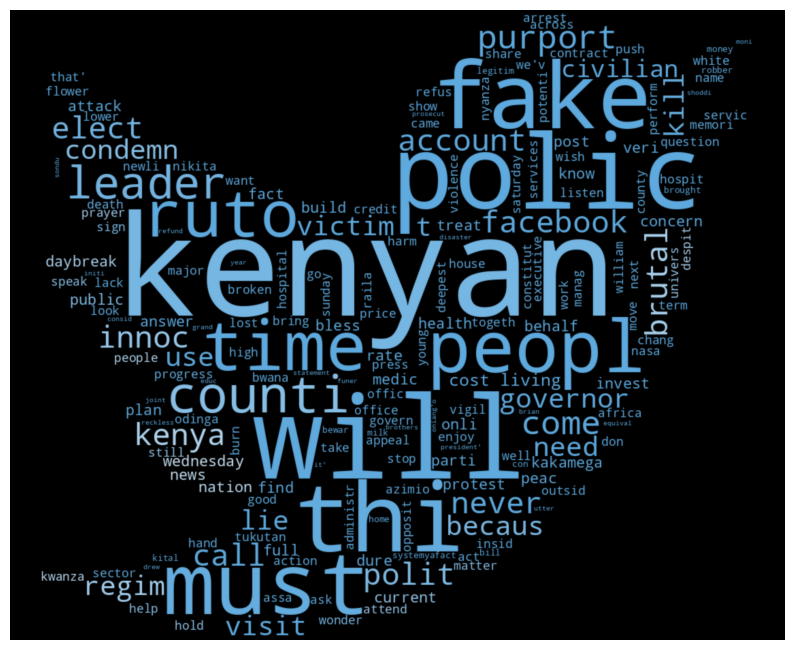

In [24]:

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [25]:
#function to extract hashtags
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags


ht_positive = Hashtags_Extract(combined_df['Tidy_Text'][combined_df['sentiment'] == 'POS'])
ht_negative = Hashtags_Extract(combined_df['Tidy_Text'][combined_df['sentiment'] == 'NEG'])



In [26]:
#unnesting list
ht_positive_unnest = sum(ht_positive,[])
ht_negative_unnest = sum(ht_negative,[])


#counting the frequency of words having positive sentiment
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
#creating a dataframe for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

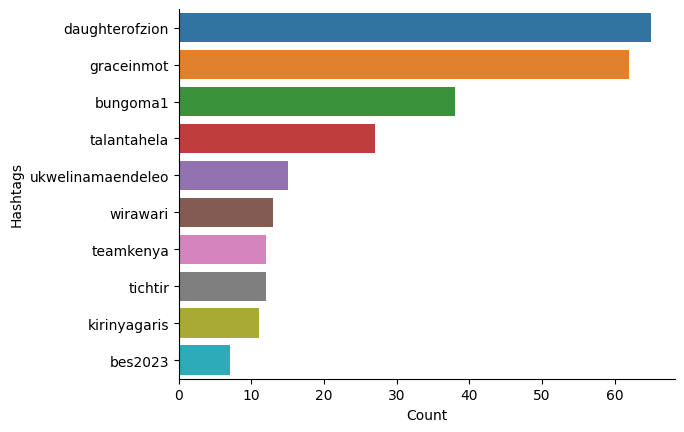

In [27]:
#plotting the barplot for the most frequently used words in hashtags
df_positive_plot = df_positive.nlargest(10,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

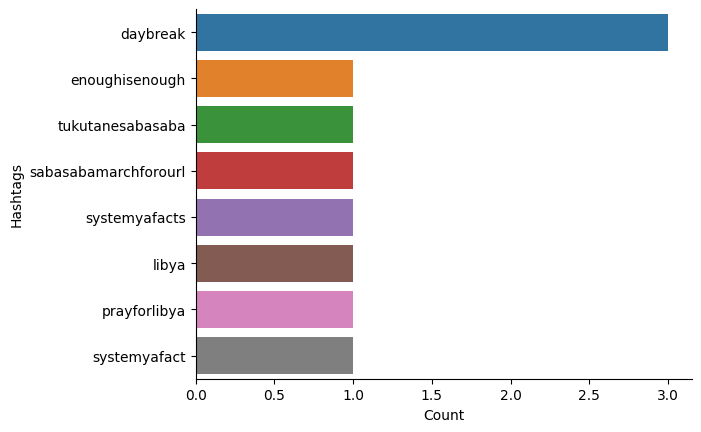

In [28]:
# counting the frequency of words having negative sentiment
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
#plotting the barplot for the most frequently used words in hashtags
df_negative_plot = df_negative.nlargest(10,columns='Count')
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [29]:
# Define a mapping dictionary
sentiment_mapping = {'POS': 0, 'NEG': 1, 'NEU': 2}

# Map the 'sentiment' column to numerical labels
combined_df['sentiment_label'] = combined_df['sentiment'].map(sentiment_mapping)

# Now, your DataFrame will have a new column 'sentiment_label' with numerical labels.


In [30]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')


# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combined_df['Tidy_Text'])
df_bow = pd.DataFrame(bow.todense())

In [31]:
tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(combined_df['Tidy_Text'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())


In [32]:
train_bow = bow[:1000]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [33]:
train_tfidf_matrix = tfidf_matrix[:1000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(
    train_bow, 
    combined_df['sentiment_label'][:1000], 
    test_size=0.3, 
    random_state=2)



In [36]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(
    train_tfidf_matrix, 
    combined_df['sentiment_label'][:1000], 
    test_size=0.3, 
    random_state=17)

In [37]:
y_train_bow.fillna(0, inplace=True)
y_valid_bow.fillna(0, inplace=True)

In [38]:
# Logistic Regression model on BOW features
logreg = LogisticRegression()
logreg.fit(x_train_bow, y_train_bow) # training the model
prediction_bow = logreg.predict_proba(x_valid_bow) # predicting on the validation set

#calculating the f1-score
prediction_int = prediction_bow[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0

#converting the results to integer type
prediction_int = prediction_int.astype(int)

log_bow= f1_score(y_valid_bow, prediction_int, average='weighted') # calculating f1 score

print("F1-Score for logistic regression BOW is: ",log_bow)

F1-Score for logistic regression BOW is:  0.5297287390029325


In [39]:
y_train_tfidf.fillna(0, inplace=True)
y_valid_tfidf.fillna(0, inplace=True)


#fitting the model with TFIDF features
logreg.fit(x_train_tfidf, y_train_tfidf)

#predicting on the validation set
prediction_tfidf = logreg.predict_proba(x_valid_tfidf)

#calculating the f1-score
prediction_int = prediction_tfidf[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0

prediction_int = prediction_int.astype(int)

log_tfidf= f1_score(y_valid_tfidf, prediction_int, average='weighted') # calculating f1 score

print("F1-Score for logistic regression TFIDF is: ",log_tfidf)

F1-Score for logistic regression TFIDF is:  0.5037052062204191


In [40]:
# SVM 
svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)

svm.fit(x_train_bow, y_train_bow) # training the model
prediction_bow = svm.predict_proba(x_valid_bow) # predicting on the validation set

#calculating the f1-score
prediction_int = prediction_bow[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0

#converting the results to integer type
prediction_int = prediction_int.astype(int)



svm_bow = f1_score(y_valid_bow, prediction_int, average='weighted') # calculating f1 score
print("F1-Score for SVM BOW is: ",svm_bow)

F1-Score for SVM BOW is:  0.5232193158953722


In [41]:
svm.fit(x_train_tfidf, y_train_tfidf) # training the model
prediction_tfidf = svm.predict_proba(x_valid_tfidf) # predicting on the validation set

prediction_int = prediction_tfidf[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int)

svm_tfidf = f1_score(y_valid_tfidf, prediction_int, average='weighted') # calculating f1 score
print("F1-Score for SVM TFIDF is: ",svm_tfidf)

F1-Score for SVM TFIDF is:  0.518967266021208


In [42]:
#Naive Bayes
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(x_train_bow, y_train_bow) # training the model

prediction_bow = nb.predict_proba(x_valid_bow) # predicting on the validation set
prediction_int = prediction_bow[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int)

nb_bow = f1_score(y_valid_bow, prediction_int, average='weighted') # calculating f1 score
print("F1-Score for Naive Bayes BOW is: ",nb_bow)

F1-Score for Naive Bayes BOW is:  0.528364969801553


In [43]:
nb.fit(x_train_tfidf, y_train_tfidf) # training the model
prediction_tfidf = nb.predict_proba(x_valid_tfidf) # predicting on the validation set

prediction_int = prediction_tfidf[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int)

nb_tfidf = f1_score(y_valid_tfidf, prediction_int, average='weighted') # calculating f1 score
print("F1-Score for Naive Bayes TFIDF is: ",nb_tfidf)

F1-Score for Naive Bayes TFIDF is:  0.5037052062204191


In [44]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

dct.fit(x_train_bow, y_train_bow) # training the model

dct_bow = dct.predict_proba(x_valid_bow) # predicting on the validation set

#calculating the f1-score
dct_bow = dct_bow[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
dct_int_bow = dct_bow.astype(int)

dct_score_bow = f1_score(y_valid_bow, dct_int_bow, average='weighted') # calculating f1 score
print("F1-Score for Decision Tree BOW is: ",dct_score_bow)


F1-Score for Decision Tree BOW is:  0.5290727325412923


In [45]:
dct.fit(x_train_tfidf, y_train_tfidf) # training the model
dct_tfidf = dct.predict_proba(x_valid_tfidf) # predicting on the validation set
#calculating the f1-score
dct_tfidf = dct_tfidf[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
dct_int_tfidf = dct_tfidf.astype(int)

dct_score_tfidf = f1_score(y_valid_tfidf, dct_int_tfidf, average='weighted') # calculating f1 score
print("F1-Score for Decision Tree TFIDF is: ",dct_score_tfidf)


F1-Score for Decision Tree TFIDF is:  0.5303105590062113


In [46]:
#Model comparison
Algo_1 = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)','SVM(Bag-of-Words)','SVM(TF-IDF)','Naive Bayes(Bag-of-Words)','Naive Bayes(TF-IDF)','Decision Tree(Bag-of-Words)','Decision Tree(TF-IDF)']

score_1 = [log_bow,log_tfidf,svm_bow,svm_tfidf,nb_bow,nb_tfidf,dct_score_bow,dct_score_tfidf]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,9)])


In [47]:
compare_1.T

,1,2,3,4,5,6,7,8
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF),SVM(Bag-of-Words),SVM(TF-IDF),Naive Bayes(Bag-of-Words),Naive Bayes(TF-IDF),Decision Tree(Bag-of-Words),Decision Tree(TF-IDF)
F1_Score,0.529729,0.503705,0.523219,0.518967,0.528365,0.503705,0.529073,0.530311


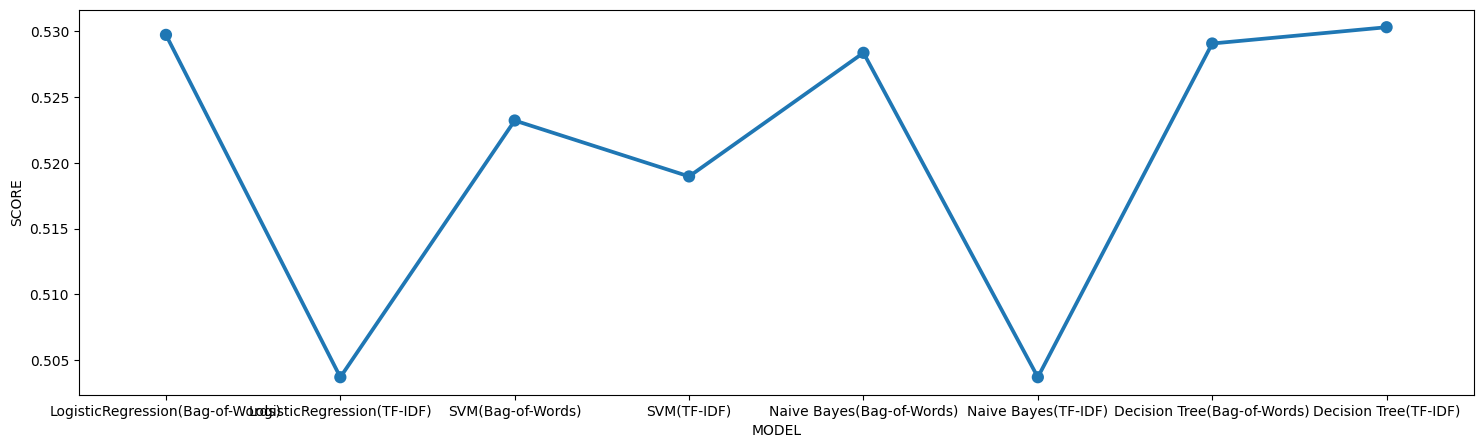

In [48]:
#comparison graph
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [56]:
df = pd.read_csv("processed_fb_posts.csv")
df_two =pd.read_csv("processed_tweets.csv")

In [57]:
df.head()

,thumb,url,text,likes,comments,shares,sentiment
0,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Matters climate change mitigation and adaptati...,19.0,0.0,2.0,NEU
1,NaN,https://www.facebook.com/christopher.kiptoo.5/...,We The National Treasury led by Cabinet Secret...,79.0,5.0,1.0,NaN
2,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Congratulations. Let us keep greening Kenya in...,22.0,0.0,0.0,POS
3,NaN,https://www.facebook.com/christopher.kiptoo.5/...,While here in Rome Italy attending the United ...,44.0,1.0,1.0,NEU
4,NaN,https://www.facebook.com/christopher.kiptoo.5/...,In Rome Italy this week accompanying Deputy Pr...,91.0,1.0,7.0,NaN


In [58]:
df_two.head()

,full_text,reply_count,retweet_count,favorite_count,url,created_at,view_count,sentiment
0,Before you throw a stone against another mwana...,447.0,3209.0,1972.0,https://twitter.com/skmusyoka/status/291771410...,2013-01-17 04:58:19+00:00,NaN,NEU
1,"Change is coming to Siaya, with Governor Willi...",38.0,22.0,8.0,https://twitter.com/WilliamOduol/status/294074...,2013-01-23 13:31:37+00:00,NaN,POS
2,Happy Easter. Mujivinjari watunguyaz na musi b...,249.0,1425.0,1094.0,https://twitter.com/WMutunga/status/7132132116...,2016-03-25 03:57:35+00:00,NaN,POS
3,It's my 69th birthday today &amp; my last day ...,1202.0,1410.0,1982.0,https://twitter.com/WMutunga/status/7432960613...,2016-06-16 04:16:05+00:00,NaN,NEU
4,"Niaje tweeps? Sasa mimi ni citizen, thanks kwa...",215.0,890.0,785.0,https://twitter.com/WMutunga/status/7435500788...,2016-06-16 21:05:27+00:00,NaN,POS


In [59]:
df.rename(columns={'text':'full_text'},inplace=True)
df.drop(columns=['likes','comments','shares'],inplace=True)

In [60]:
df_two.drop(columns=['reply_count','retweet_count','favorite_count','created_at','view_count'],inplace=True)

In [61]:
new_df = pd.concat([df,df_two],ignore_index=True)

In [62]:
new_df.head()

,thumb,url,full_text,sentiment
0,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Matters climate change mitigation and adaptati...,NEU
1,NaN,https://www.facebook.com/christopher.kiptoo.5/...,We The National Treasury led by Cabinet Secret...,NaN
2,NaN,https://www.facebook.com/christopher.kiptoo.5/...,Congratulations. Let us keep greening Kenya in...,POS
3,NaN,https://www.facebook.com/christopher.kiptoo.5/...,While here in Rome Italy attending the United ...,NEU
4,NaN,https://www.facebook.com/christopher.kiptoo.5/...,In Rome Italy this week accompanying Deputy Pr...,NaN


In [63]:
new_df.shape

(14951, 4)

In [64]:
new_df.to_csv("combined_data.csv",index=False)